# CURSO DATA SCIENCE DIGITAL HOUSE

# WORKSHOP III: Análisis de Clasificación (Caso AFP)
# PARTE A: Análisis Exploratorio de Datos - EDA

## Grupo 3 - Integrantes

- D'HUTEAU, Yann F
- MESA, Andrés
- HERNANDEZ, Adrián
- CORBATTO, Mauricio D

## Introducción


Para este trabajo se pretende realizar un análisis de diferentes algoritmos de clasificación para una empresa  AFP, radicada en Colombia, con el fin de predecir si una persona seguirá aportando al sistema como afiliada o dejará de hacerlo. Esto se realizará con la ayuda de herramientas analíticas vistas anteriormente. Para alcanzar esta meta, se deberá realizar una limpieza y adecuación del dataset original.

<a id="section_toc"></a> 
## Tabla de Contenido


[1. Importar librerías](#section_importar_libreria)

[2. Dataset](#section_dataset)

[3. Detección de valores faltantes - Borrado de Columnas](#section_deteccion_faltantes)

[4. Eliminación de duplicados](#section_eliminar_duplicados)

[5. Exploración de variables No Numéricas](#section_variables_no_numericas)

[6. Exploración de variables Numéricas](#section_variables_numericas)

[7. Visualización parcial de los datos. Eliminación de columnas y valores nulos](#section_visualiz_datos) 

[8. Generación de la variable Target (Labelling)](#section_labelling) 

[9. Exportación a archivo csv](#section_archivo_csv) 


<a id="section_importar_libreria"></a> 
### 1. IMPORTAR LIBRERÍAS

   Importaremos las librerías necesarias que nos ayudarán con la conexión, extracción, análisis y modificación del dataset.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import distplot
import re
import matplotlib.pyplot as plt
import numpy as np
import warnings
#import scipy.stats as ss
#from scipy.stats import levene
#import geomet
#from geomet import wkt
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn import metrics
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_validate, cross_val_score
#from sklearn.metrics import mean_squared_error
#import plotly.express as px
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 30

<a id="section_dataset"></a> 
### 2. DATASET


El dataset que usaremos en esta practica contiene la información de multiples socios de la AFP, suministrada por dicha empresa, la cuál nos ayudará para el estudio de clasificación, destacamos las siguientes variables:

**Afi_hash64**: Identificación del afiliado.

**descTipoAfiliado:**: 

•	Dependiente: tiene un contrato laboral con una empresa

•	Independiente: la empresa que genera el aporte es por parte del mismo afiliado

•	Mixto: tiene un contrato laboral con una empresa, pero a su vez aporta por su cuenta.

•	Voluntario: aporta voluntariamente sin contrato de una empresa.


**PeriodoGeneracionCuenta**: Año y mes de la generación de cuenta con la AFP.

**DescripcionTipoVinculacion: **: 

•	Traslado AFP: El afiliado crea su cuenta a partir de un traslado desde otra AFP.

•	Traslado Régimen: El afiliado crea su cuenta a partir de un traslado desde otro régimen.

•	Vinculación Inicial: El afiliado llega a partir de una venta desde 0.


**Ciudad**: Ciudad de ubicación del Afiliado

**Regional**: Regional correspondiente a la ciudad de ubicación

**descSexo**: Género del afiliado Femenino o Masculino

**edadAfiliado**: la edad del afiliado

**RangoIBC_2020**: Rango salarial de los afiliados

**Aportes_2020**: Cantidad de aportes en el año (máximo 12, es decir 1 mensual), para los aportes del 2022, la cantidad máxima llega a 6 ya que hay aportes de algunas personas hasta junio 2022.
Afi_hash64

-------------------------------------
Leemos los datos desde el archivo csv

In [2]:
df = pd.read_csv('PronosticoAportes.csv', sep=';')
df.head()

,afi_hash64,descTipoAfiliado,PeriodoGeneracionCuenta,DescripcionTipoVinculacion,Ciudad,Regional,descSexo,edadAfiliado,RangoIBC_2020,Aportes_2020,RangoIBC_2021,Aportes_2021,RangoIBC_2022,Aportes_2022
0,5b19d29e1bad890066046b1d547ac00367457bc5,DEPENDIENTE,202205,VINCULACIÓN INICIAL,CÚCUTA,REGIONAL CENTRO,FEMENINO,50.0,NaN,NaN,NaN,NaN,1 SMLV,2.0
1,5491d151a6f5d54364011f13c7b55eb1f53b629f,DEPENDIENTE,202203,TRASLADO DE AFP,GUADALAJARA DE BUGA,REGIONAL OCCIDENTE Y CAFETERA,FEMENINO,27.0,NaN,NaN,NaN,NaN,2-4 SMLV,2.0
2,2f5541439ddd3dfc7a7bfa082d59e35721fe3db2,DEPENDIENTE,202203,VINCULACIÓN INICIAL,PASTO,REGIONAL OCCIDENTE Y CAFETERA,FEMENINO,37.0,NaN,NaN,NaN,NaN,1 SMLV,1.0
3,ef0f09766f9180f07727fb579ff3d714bf948a0b,DEPENDIENTE,202203,VINCULACIÓN INICIAL,IBAGUÉ,REGIONAL CENTRO,MASCULINO,23.0,NaN,NaN,NaN,NaN,1-2 SMLV,4.0
4,00c6845d1cf5338595e321d8e2be599a528a2f50,INDEPENDIENTE,202201,VINCULACIÓN INICIAL,IBAGUÉ,REGIONAL CENTRO,FEMENINO,23.0,NaN,NaN,NaN,NaN,1 SMLV,5.0


<a id="section_deteccion_faltantes"></a> 
### 3. DETECCIÓN DE VALORES FALTANTES. BORRADO DE COLUMNAS


Comenzaremos detectando qué registros tienen valores nulos para luego calcular el porcentaje de valores faltantes en cada columna.

Para esto se define una función que contará la cantidad de nulos, y total de registros para calcular dicha métrica.


In [3]:
def obtener_info_data(data):
    total_rows = data.shape[0]
    df_info = pd.DataFrame(columns=['Nulos','NoNulos', 'NulosPorc', 'NoNulosPorc', 'TypeData'])
    for col in data.columns:
        nulos = data[col].isnull().sum()
        no_nulos = data[col].notnull().sum()
        nulos_perc = round(100 * nulos/total_rows,2)
        no_nulos_perc = round(100 * no_nulos/total_rows,2)
        type_data = data[col].dtypes
        df_info.loc[col] = [nulos, no_nulos, nulos_perc, no_nulos_perc, type_data]
        
    return df_info

In [4]:
# Definimos una función para eliminar columnas
columnas_eliminadas = []
def  borrar_columna(data, columna):
    try:
        data.drop(columna, axis=1, inplace=True)
        columnas_eliminadas.append(columna)
        print(f'Eliminando columna: {columna}')
        print(f'Lista de columnas eliminadas: {columnas_eliminadas}')
        print('-' * 100)
    except:
        print(f'La columna {columna} ya ha sido eliminada')
        print(f'Lista de columnas eliminadas: {columnas_eliminadas}') 
        print('-' * 100)

--------------------------
Se ejecuta entonces la función de Detección de Valores faltantes para analizar el poblamiento de datos del Dataset

In [5]:
obtener_info_data(df)

,Nulos,NoNulos,NulosPorc,NoNulosPorc,TypeData
afi_hash64,0,500000,0.00,100.00,object
descTipoAfiliado,197,499803,0.04,99.96,object
PeriodoGeneracionCuenta,0,500000,0.00,100.00,int64
DescripcionTipoVinculacion,0,500000,0.00,100.00,object
Ciudad,14434,485566,2.89,97.11,object
Regional,11700,488300,2.34,97.66,object
descSexo,60,499940,0.01,99.99,object
edadAfiliado,1,499999,0.00,100.00,float64
RangoIBC_2020,351067,148933,70.21,29.79,object
Aportes_2020,345119,154881,69.02,30.98,float64


<Figure size 1080x432 with 0 Axes>

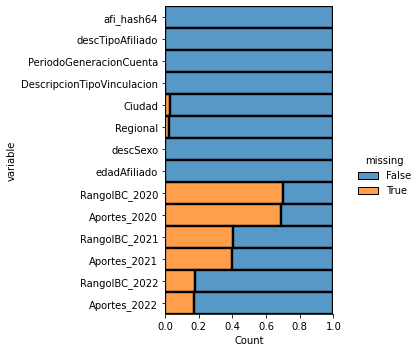

In [6]:
# OTRA MANERA DE GRAFICAR LAS VARIABLES NULAS
plt.figure(figsize=(15,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", multiple="fill", hue="missing", aspect=1)

<a id="section_eliminar_duplicados"></a> 
### 4. ELIMINACIÓN DE DUPLICADOS

Antes de la eliminación de elementos duplicados, observaremos el tamaño de la tabla con la función **Shape**.


In [7]:
print("Shape antes de eliminar duplicados")
display(df.shape)
duplicados = df.loc[df.duplicated(subset= 'afi_hash64', keep='last')]
df.drop(duplicados.index, inplace=True)
print("Shape despues de eliminar duplicados")
display(df.shape)      

Shape antes de eliminar duplicados


(500000, 14)

Shape despues de eliminar duplicados


(493063, 14)

<a id="section_variables_no_numericas"></a> 
### 5. EXPLORACIÓN DE VARIABLES NO NUMÉRICAS

In [8]:
cat_columns = ['descTipoAfiliado', 'DescripcionTipoVinculacion', 'Ciudad',
       'Regional', 'descSexo']
for column in cat_columns:
    print(column, df[column].unique())
    print("-" * 100)

descTipoAfiliado ['DEPENDIENTE         ' 'INDEPENDIENTE       ' 'VOLUNTARIO          '
 'MIXTO               ' nan]
----------------------------------------------------------------------------------------------------
DescripcionTipoVinculacion ['VINCULACIÓN INICIAL' 'TRASLADO DE AFP' 'TRASLADO DE RÉGIMEN']
----------------------------------------------------------------------------------------------------
Ciudad ['CÚCUTA' 'GUADALAJARA DE BUGA' 'IBAGUÉ' 'SIN CLASIFICAR' 'MONTERÍA'
 'PASTO' 'BUENAVENTURA' 'APARTADÓ' 'POPAYÁN' '76001' 'BUGA' '20001'
 'VENTA EMPLEADOR' '0' 'SAN JUAN DE PASTO' 'MONTELIBANO' 'GIRARDOT'
 'ECCOMERCE' '11001' '5001' '68081' '15001' '73001' 'POPAYAN' 'SINCLASIF'
 'PALMIRA' '68001' '23001' '5615' '13001' '52001' '8001' '54001' '50001'
 '41001' '63001' '47001' '66001' '17001' nan 'CALI' 'NEIVA' 'TUNJA'
 'CUCUTA' 'IBAGUE' 'ARMENIA' 'BOGOTÁ' 'PEREIRA' 'APARTADO' 'MEDELLIN'
 'MONTERIA' 'RIONEGRO' 'CARTAGENA' 'ECOMMERCE' 'MANIZALES' 'MEDELLÍN'
 'SIN CLASIF' 'VALLEDUPA

Podemos ver en los valores únicos de las variables categóricas que hay varios tipos de errores a corregir:
- Datos de tipo string con espacios  antes y despues
- Nombres de ciudades con valores numéricos, con acento y sin acento
- Nombres de ciudades o de Regional abreviados y otros escritos de manera completa

In [9]:
# 1- ELIMINACION DE ESPACIOS EN BLANCO ANTES Y DESPUES EN DATOS DE TIPO STRING
for col in cat_columns:
    df[col] = df[col].str.strip() 

A continuación cambiaremos las ciudades que aparecen con valores numéricos por los nombres de las 
ciudades obtenidas de la siguienta página web: https://www.rankia.co/blog/dian/3988807-codigo-municipios-dian#c%C3%B3digo-municipios-dian:-tabla

In [10]:
ciudades_dict = {'76001': 'CALI',
                  '20001': 'VALLEDUPAR',
                 '11001': 'BOGOTA',
                 '5001': 'MEDELLIN',
                 '68081': 'BARRANCABERMEJA',
                 '15001': 'TUNJA',
                 '73001': 'IBAGUE',
                 '68001': 'BUCARAMANGA',
                 '23001': 'MONTERIA',
                 '5615': 'RIONEGRO',
                 '13001': 'CARTAGENA',
                 '52001': 'PASTO',
                 '8001': 'BARRANQUILLA',
                 '54001': 'CUCUTA',
                 '50001': 'VILLAVICENCIO',
                 '41001': 'NEIVA',
                 '63001': 'ARMENIA',
                 '47001': 'SANTA MARTA',
                 '66001': 'PEREIRA',
                 '17001': 'MANIZALES'      
                }
df.Ciudad.replace(ciudades_dict, inplace=True)

In [11]:
ciudades_correc_dict = {'CÚCUTA': 'CUCUTA',
                        'IBAGUÉ': 'IBAGUE',
                        'MONTERÍA': 'MONTERIA',
                        'APARTADÓ': 'APARTADO',
                        'POPAYÁN': 'POPAYAN',
                        'VENTA EMPLEADOR': 'SIN CLASIFICAR',
                        '0': 'SIN CLASIFICAR',
                        'ECCOMERCE': 'SIN CLASIFICAR',
                        'SINCLASIF': 'SIN CLASIFICAR',
                        'BOGOTÁ': 'BOGOTA',
                        'ECOMMERCE': 'SIN CLASIFICAR',
                        'MEDELLÍN': 'MEDELLIN',
                        'SIN CLASIF': 'SIN CLASIFICAR',
                        'SANTAFE DE BOGOTA': 'BOGOTA',
                        'SEDE ADMINISTRATIVA MEDELLIN': 'MEDELLIN' 
                    }
df.Ciudad.replace(ciudades_correc_dict, inplace=True)

In [12]:
for column in cat_columns:
    print(column, df[column].unique())
    print("-" * 100)

descTipoAfiliado ['DEPENDIENTE' 'INDEPENDIENTE' 'VOLUNTARIO' 'MIXTO' nan]
----------------------------------------------------------------------------------------------------
DescripcionTipoVinculacion ['VINCULACIÓN INICIAL' 'TRASLADO DE AFP' 'TRASLADO DE RÉGIMEN']
----------------------------------------------------------------------------------------------------
Ciudad ['CUCUTA' 'GUADALAJARA DE BUGA' 'IBAGUE' 'SIN CLASIFICAR' 'MONTERIA'
 'PASTO' 'BUENAVENTURA' 'APARTADO' 'POPAYAN' 'CALI' 'BUGA' 'VALLEDUPAR'
 'SAN JUAN DE PASTO' 'MONTELIBANO' 'GIRARDOT' 'BOGOTA' 'MEDELLIN'
 'BARRANCABERMEJA' 'TUNJA' 'PALMIRA' 'BUCARAMANGA' 'RIONEGRO' 'CARTAGENA'
 'BARRANQUILLA' 'VILLAVICENCIO' 'NEIVA' 'ARMENIA' 'SANTA MARTA' 'PEREIRA'
 'MANIZALES' nan]
----------------------------------------------------------------------------------------------------
Regional ['REGIONAL CENTRO' 'REGIONAL OCCIDENTE Y CAFETERA' 'REGIONAL CARIBE'
 'REGIONAL ANTIOQUIA' 'EQUIPO CANALES Y GESTION COMERCIAL'
 'EQUIPO CENTRO

In [13]:
tipoVinc_correc_dict = {'VINCULACIÓN INICIAL': 'VINCULACION INICIAL',
                        'SINCLASIF': 'SIN CLASIFICAR',
                    }
df.DescripcionTipoVinculacion.replace(tipoVinc_correc_dict, inplace=True)

In [14]:
regional_correc_dict = {'ECCOMERCE': 'ECOMMERCE',
                        'SINCLASIF': 'SIN CLASIFICAR',
                        'REGIONAL OCCIDENTE Y CAFETERA NI': 'REGIONAL OCCIDENTE Y CAFETERA',
                        'SIN CLASIF': 'SIN CLASIFICAR',                        
                    }
df.Regional.replace(regional_correc_dict, inplace=True)

In [15]:
for column in cat_columns:
    print(column, df[column].unique())
    print("-" * 100)

descTipoAfiliado ['DEPENDIENTE' 'INDEPENDIENTE' 'VOLUNTARIO' 'MIXTO' nan]
----------------------------------------------------------------------------------------------------
DescripcionTipoVinculacion ['VINCULACION INICIAL' 'TRASLADO DE AFP' 'TRASLADO DE RÉGIMEN']
----------------------------------------------------------------------------------------------------
Ciudad ['CUCUTA' 'GUADALAJARA DE BUGA' 'IBAGUE' 'SIN CLASIFICAR' 'MONTERIA'
 'PASTO' 'BUENAVENTURA' 'APARTADO' 'POPAYAN' 'CALI' 'BUGA' 'VALLEDUPAR'
 'SAN JUAN DE PASTO' 'MONTELIBANO' 'GIRARDOT' 'BOGOTA' 'MEDELLIN'
 'BARRANCABERMEJA' 'TUNJA' 'PALMIRA' 'BUCARAMANGA' 'RIONEGRO' 'CARTAGENA'
 'BARRANQUILLA' 'VILLAVICENCIO' 'NEIVA' 'ARMENIA' 'SANTA MARTA' 'PEREIRA'
 'MANIZALES' nan]
----------------------------------------------------------------------------------------------------
Regional ['REGIONAL CENTRO' 'REGIONAL OCCIDENTE Y CAFETERA' 'REGIONAL CARIBE'
 'REGIONAL ANTIOQUIA' 'EQUIPO CANALES Y GESTION COMERCIAL'
 'EQUIPO CENTRO

<a id="section_variables_numericas"></a> 
### 6. EXPLORACIÓN DE VARIABLES NUMÉRICAS

Haremos eun regex del rango de valores de Salario Mínimo de los diferentes afiliados, para luego poder estimar
su salario, en base a la cantidad de Salario Mínimo Vital que posee dicha persona.

#### 6.1 Calculo de IBC promedio 2021 y 2022

Calcularemos la cantidad promedio de Salarios Mínimo Vital y Móvil equivalente al nivel de ingresos que tiene cada afiliado.
Esto lo haremos para el año 2021, ya que es el período que contiene menor cantidad de valores nulos.
Lo hacemos haciendo un "regex" sobre la variable "RangoIBC_2021", esto nos dará un rango, para luego poder calcular
el promedio dobre ese rango llamado "ibc_prom_2021".
Luego repetimos los mismos pasos mencionados anteriormente para calcular "ibc_prom_2022".

In [16]:
pattern_sal = r'(\d+)\s|(\d+\-\d+)\s(SMLV)'
df_1 = df.RangoIBC_2021.str.extract(pattern_sal, re.IGNORECASE, expand=True)
df_2 = df_1[1].str.split(pat='-',expand=True)
df_2.columns = [3,4]
df_ibc_2021 = pd.concat([df_1, df_2], axis=1)
df_ibc_2021 = df_ibc_2021.drop(columns=[1,2]).astype(float)
df_ibc_2021.columns = ['ibc_1', 'ibc_2', 'ibc_3']

In [17]:
df_ibc_2021['ibc_prom_2021'] = df_ibc_2021.ibc_1.copy()
df_ibc_2021.loc[(df_ibc_2021.ibc_2 != 0) & (df_ibc_2021.ibc_3 != 0) & \
                (df_ibc_2021.ibc_prom_2021.isnull()), 'ibc_prom_2021'] = (df_ibc_2021.ibc_2 + df_ibc_2021.ibc_3)/2
df_ibc_2021 = df_ibc_2021.drop(columns=['ibc_1', 'ibc_2', 'ibc_3'])
df['ibc_prom_2021'] = df_ibc_2021['ibc_prom_2021']
#df

In [18]:
pattern_sal = r'(\d+)\s|(\d+\-\d+)\s(SMLV)'
df_1_2 = df.RangoIBC_2022.str.extract(pattern_sal, re.IGNORECASE, expand=True)
df_2_2 = df_1_2[1].str.split(pat='-',expand=True)
df_2_2.columns = [3,4]
df_ibc_2022 = pd.concat([df_1_2, df_2_2], axis=1)
df_ibc_2022 = df_ibc_2022.drop(columns=[1,2]).astype(float)
df_ibc_2022.columns = ['ibc_1', 'ibc_2', 'ibc_3']

In [19]:
df_ibc_2022['ibc_prom_2022'] = df_ibc_2022.ibc_1.copy()
df_ibc_2022.loc[(df_ibc_2022.ibc_2 != 0) & (df_ibc_2022.ibc_3 != 0) & \
                (df_ibc_2022.ibc_prom_2022.isnull()), 'ibc_prom_2022'] = (df_ibc_2022.ibc_2 + df_ibc_2022.ibc_3)/2
df_ibc_2022 = df_ibc_2022.drop(columns=['ibc_1', 'ibc_2', 'ibc_3'])
df['ibc_prom_2022'] = df_ibc_2022['ibc_prom_2022']
#df

#### 6.2 Obtención de la fecha de ingreso

La fecha de ingreso la obtendremos haciendo un regex sobre la variable "PeriodoGeneracionCuenta" y, luego, pasándola
al formato datetime. Cabe aclarar que suponemos ingreso para todos los casos el primer día de cada mes.

In [20]:
fecha_patron = r'(\d\d\d\d)(\d\d)'
df_fecha = df['PeriodoGeneracionCuenta'].astype(str).str.extract(fecha_patron, re.IGNORECASE, expand=False)
df_fecha.columns = ['year', 'month']
df_fecha['fecha'] = pd.to_datetime({'year':df_fecha['year'],
                                  'month':df_fecha['month'],
                                  'day': np.ones(len(df_fecha['year']))})
df_fecha = df_fecha.drop(columns=['year', 'month'], axis=1)
df['fecha_ingreso'] = df_fecha['fecha']
#df.head(5)

#### 6.3 Cálculo de variable antiguedad

Calcularemos la variable auxiliar "antiguedad" en dias y meses para poder utilizarla más adelante.
Lo calcularemos restando la fecha de ingreso con la fecha límite establecida como 30-06-2022.

In [21]:
df['fecha_ingreso'].max()

Timestamp('2022-05-01 00:00:00')

In [22]:
from datetime import datetime
fecha_cierre = datetime(2022,6,30)

df['antig_Dias'] = fecha_cierre - df['fecha_ingreso']
df['antig_Dias'] = df['antig_Dias'].astype('timedelta64[D]')
df['antig_Dias'] = df['antig_Dias'].astype(int)


df['antig_Meses'] = round(df['antig_Dias']/30,0)
#df

<a id="section_visualiz_datos"></a>    
### 7. VISUALIZACIÓN PARCIAL DE LOS DATOS. ELIMINACIÓN DE COLUMNAS Y VALORES NULOS

#### 7.1 Visualización parcial de los datos

**Realizamos una inspección en el trabajo parcial realizado para ir visualizando los datos.**

In [23]:
obtener_info_data(df)

,Nulos,NoNulos,NulosPorc,NoNulosPorc,TypeData
afi_hash64,0,493063,0.00,100.00,object
descTipoAfiliado,193,492870,0.04,99.96,object
PeriodoGeneracionCuenta,0,493063,0.00,100.00,int64
DescripcionTipoVinculacion,0,493063,0.00,100.00,object
Ciudad,14421,478642,2.92,97.08,object
Regional,11693,481370,2.37,97.63,object
descSexo,60,493003,0.01,99.99,object
edadAfiliado,1,493062,0.00,100.00,float64
RangoIBC_2020,345433,147630,70.06,29.94,object
Aportes_2020,339572,153491,68.87,31.13,float64


#### 7.2 Eliminación de columnas

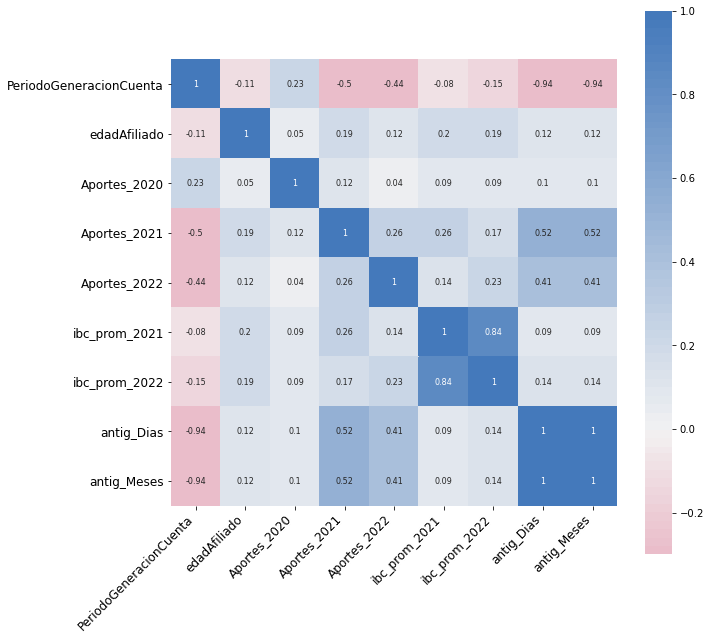

In [24]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    df.corr().round(2),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -0.3,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(0, 250, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

Borraremos las siguientes columnas:
- PeriodoGeneracionCuenta: reemplazada por "fecha_ingreso"
- RangoIBC_2020: Alto porcentaje de valores nulos
- Aportes_2020: Alto porcentaje de valores nulos
- RangoIBC_2021: reemplazada por "ibc_prom_2021"
- **ibc_prom_2021**: tiene alta correlación con ibc_prom_2022 (0.84), que es a su vez otra variable predictora,
  por lo cual la eliminaremos.
- RangoIBC_2022: reemplazada por "ibc_prom_2022"

In [25]:
borrar_columna(df, 'PeriodoGeneracionCuenta')
borrar_columna(df, 'RangoIBC_2020') 
borrar_columna(df, 'Aportes_2020')
borrar_columna(df, 'RangoIBC_2021')
borrar_columna(df, 'RangoIBC_2022')
borrar_columna(df, 'ibc_prom_2021')

Eliminando columna: PeriodoGeneracionCuenta
Lista de columnas eliminadas: ['PeriodoGeneracionCuenta']
----------------------------------------------------------------------------------------------------
Eliminando columna: RangoIBC_2020
Lista de columnas eliminadas: ['PeriodoGeneracionCuenta', 'RangoIBC_2020']
----------------------------------------------------------------------------------------------------
Eliminando columna: Aportes_2020
Lista de columnas eliminadas: ['PeriodoGeneracionCuenta', 'RangoIBC_2020', 'Aportes_2020']
----------------------------------------------------------------------------------------------------
Eliminando columna: RangoIBC_2021
Lista de columnas eliminadas: ['PeriodoGeneracionCuenta', 'RangoIBC_2020', 'Aportes_2020', 'RangoIBC_2021']
----------------------------------------------------------------------------------------------------
Eliminando columna: RangoIBC_2022
Lista de columnas eliminadas: ['PeriodoGeneracionCuenta', 'RangoIBC_2020', 'Aportes_2

In [26]:
obtener_info_data(df)

,Nulos,NoNulos,NulosPorc,NoNulosPorc,TypeData
afi_hash64,0,493063,0.00,100.00,object
descTipoAfiliado,193,492870,0.04,99.96,object
DescripcionTipoVinculacion,0,493063,0.00,100.00,object
Ciudad,14421,478642,2.92,97.08,object
Regional,11693,481370,2.37,97.63,object
descSexo,60,493003,0.01,99.99,object
edadAfiliado,1,493062,0.00,100.00,float64
Aportes_2021,193562,299501,39.26,60.74,float64
Aportes_2022,85750,407313,17.39,82.61,float64
ibc_prom_2022,91323,401740,18.52,81.48,float64


In [27]:
df.describe()

,edadAfiliado,Aportes_2021,Aportes_2022,ibc_prom_2022,antig_Dias,antig_Meses
count,493062.000000,299501.000000,407313.000000,401740.000000,493063.000000,493063.000000
mean,27.834516,5.873613,4.322344,1.800223,448.747197,14.807994
std,8.648180,3.814774,2.149317,1.461609,263.621866,8.665343
min,-1.000000,1.000000,1.000000,1.000000,60.000000,2.000000
25%,21.000000,2.000000,2.000000,1.000000,180.000000,6.000000
50%,25.000000,5.000000,5.000000,1.500000,455.000000,15.000000
75%,33.000000,10.000000,6.000000,1.500000,667.000000,22.000000
max,110.000000,12.000000,7.000000,10.000000,911.000000,30.000000


#### 7.3 Eliminación de valores nulos, en algunas variables

In [28]:
col_nulos = ['descTipoAfiliado', 'Ciudad', 'Regional', 'descSexo', 'Aportes_2021', 'Aportes_2022', 'ibc_prom_2022']
for col in col_nulos:
    df_temp = df.loc[df[col].isna()]
    df.drop(df_temp.index, inplace=True)
    print(f'De la columna {col} se eliminaron: {df_temp.shape[0]} valores nulos.')

De la columna descTipoAfiliado se eliminaron: 193 valores nulos.
De la columna Ciudad se eliminaron: 14409 valores nulos.
De la columna Regional se eliminaron: 17 valores nulos.
De la columna descSexo se eliminaron: 5 valores nulos.
De la columna Aportes_2021 se eliminaron: 183250 valores nulos.
De la columna Aportes_2022 se eliminaron: 64375 valores nulos.
De la columna ibc_prom_2022 se eliminaron: 4689 valores nulos.


In [29]:
obtener_info_data(df)

,Nulos,NoNulos,NulosPorc,NoNulosPorc,TypeData
afi_hash64,0,226125,0.0,100.0,object
descTipoAfiliado,0,226125,0.0,100.0,object
DescripcionTipoVinculacion,0,226125,0.0,100.0,object
Ciudad,0,226125,0.0,100.0,object
Regional,0,226125,0.0,100.0,object
descSexo,0,226125,0.0,100.0,object
edadAfiliado,0,226125,0.0,100.0,float64
Aportes_2021,0,226125,0.0,100.0,float64
Aportes_2022,0,226125,0.0,100.0,float64
ibc_prom_2022,0,226125,0.0,100.0,float64


#### 7.4 Visualizando el dataset, encontrando valores anómalos. Eliminación de Outliers:

In [30]:
df.describe()

,edadAfiliado,Aportes_2021,Aportes_2022,ibc_prom_2022,antig_Dias,antig_Meses
count,226125.000000,226125.000000,226125.000000,226125.000000,226125.000000,226125.000000
mean,28.481610,6.434715,5.283931,2.027578,558.996829,18.431629
std,8.273223,3.862893,1.949347,1.667481,200.968307,6.604803
min,-1.000000,1.000000,1.000000,1.000000,60.000000,2.000000
25%,22.000000,3.000000,4.000000,1.000000,394.000000,13.000000
50%,26.000000,7.000000,6.000000,1.500000,576.000000,19.000000
75%,33.000000,10.000000,7.000000,1.500000,698.000000,23.000000
max,110.000000,12.000000,7.000000,10.000000,911.000000,30.000000


Ahora visualizaremos los outliers a considerar para su eliminación.

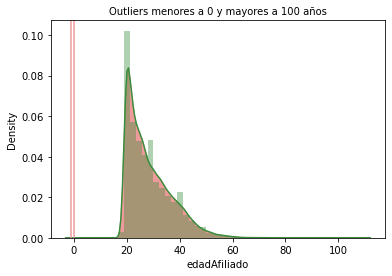

In [31]:
#Plotemos los outliers

stat= df.edadAfiliado
x0 = -1
x1 = 0


#plotting the PDF (do this before plotting anything else)
ax = sns.distplot(stat, hist=True,color='#388E3C')
kde_x, kde_y = ax.lines[0].get_data()

#plotting the two lines
p1 = plt.axvline(x=x0,color='#EF9A9A')
p2 = plt.axvline(x=x1,color='#EF9A9A')


ax.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1) , 
                interpolate=True, color='#EF9A9A')
# Decoration
plt.title('Outliers menores a 0 y mayores a 100 años', fontsize=10)

plt.show()

In [32]:
#Podemos Observar que hay personas con edad -1 y hay personas con edad 110 años.
display(df.loc[df['edadAfiliado'] == df['edadAfiliado'].max(), 'edadAfiliado'])
display(df.loc[df['edadAfiliado'] == df['edadAfiliado'].min(), 'edadAfiliado']) 

63859    110.0
Name: edadAfiliado, dtype: float64

364033   -1.0
478271   -1.0
Name: edadAfiliado, dtype: float64

In [33]:
(df.loc[df['edadAfiliado'] == df['edadAfiliado'].max(), 'edadAfiliado']).value_counts()
#(df.loc[df['edadAfiliado'] == df['edadAfiliado'].min(), 'edadAfiliado']).value_counts()

110.0    1
Name: edadAfiliado, dtype: int64

In [34]:
#Imputaremos dichos 4 valores con la mediana
df.loc[df['edadAfiliado'] == df['edadAfiliado'].max(), 'edadAfiliado'] =  df['edadAfiliado'].median()
df.loc[df['edadAfiliado'] == df['edadAfiliado'].min(), 'edadAfiliado'] =  df['edadAfiliado'].median()

In [35]:
df.describe()

,edadAfiliado,Aportes_2021,Aportes_2022,ibc_prom_2022,antig_Dias,antig_Meses
count,226125.000000,226125.000000,226125.000000,226125.000000,226125.000000,226125.000000
mean,28.481477,6.434715,5.283931,2.027578,558.996829,18.431629
std,8.270987,3.862893,1.949347,1.667481,200.968307,6.604803
min,2.000000,1.000000,1.000000,1.000000,60.000000,2.000000
25%,22.000000,3.000000,4.000000,1.000000,394.000000,13.000000
50%,26.000000,7.000000,6.000000,1.500000,576.000000,19.000000
75%,33.000000,10.000000,7.000000,1.500000,698.000000,23.000000
max,95.000000,12.000000,7.000000,10.000000,911.000000,30.000000


Mostramos gráficamente la imputación realizada.

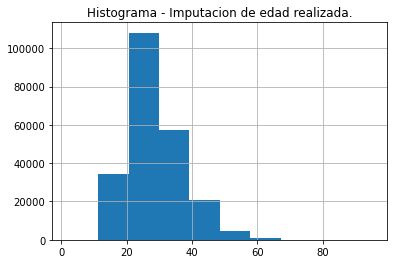

In [36]:
#Mostramos gráficamente la imputación realizada.
EdadAfiliados = df['edadAfiliado']
bin=30
plt.hist(EdadAfiliados)
plt.title('Histograma - Imputacion de edad realizada.')
plt.grid(True)

Vemos que luego de imputacion se corrijen los valores superiores a 100 y quedan en menos de 80 años y los valores menores a 0 se ubican en 18 en adelante.

Para realizar un análisis que sea de 6 meses, eliminamos los registros que contengan aportes mayor a 6 meses.

In [37]:
df_tmp = df.loc[df['Aportes_2022'] > 6]
df_tmp.shape
df = df.drop(df_tmp.index)

In [38]:
#Funcion para detección de outliers
# Adaptada, se achica lower limit para no tener valores de edad poco razonales

def find_anomalies(data,col):   
    
    ''' Detection '''
    # IQR
    Q1 = np.percentile(data[col] , 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(data[col] , 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
 
    print("Old Shape: ", data.shape)
 
    # Upper bound
    upper = data.loc[data[col] >= (Q3+2.5*IQR)]
    # Lower bound
    lower = data.loc[data[col] <= (Q1-0.5*IQR)]
 
    ''' Removing the Outliers '''
    data.drop(upper.index, inplace = True)
    data.drop(lower.index, inplace = True)
 
    print("New Shape: ", data.shape)
    return data

In [39]:
df = find_anomalies(df, 'edadAfiliado')

Old Shape:  (143370, 13)
New Shape:  (143233, 13)


In [40]:
#Funcion para detección de outliers (La modificamos a su forma original)

def find_anomalies_v1(data,col):   
    
    ''' Detection '''
    # IQR
    Q1 = np.percentile(data[col] , 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(data[col] , 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
 
    print("Old Shape: ", data.shape)
 
    # Upper bound
    upper = data.loc[data[col] >= (Q3+1.5*IQR)]
    # Lower bound
    lower = data.loc[data[col] <= (Q1-1.5*IQR)]
 
    ''' Removing the Outliers '''
    data.drop(upper.index, inplace = True)
    data.drop(lower.index, inplace = True)
 
    print("New Shape: ", data.shape)
    return data

Modificamos levemente la función anterior para detectar outliers en "ibc_prom_2021" y "ibc_prom_2022".

In [41]:
df = find_anomalies_v1(df, 'ibc_prom_2022')

Old Shape:  (143233, 13)
New Shape:  (114276, 13)


In [42]:
obtener_info_data(df)

,Nulos,NoNulos,NulosPorc,NoNulosPorc,TypeData
afi_hash64,0,114276,0.0,100.0,object
descTipoAfiliado,0,114276,0.0,100.0,object
DescripcionTipoVinculacion,0,114276,0.0,100.0,object
Ciudad,0,114276,0.0,100.0,object
Regional,0,114276,0.0,100.0,object
descSexo,0,114276,0.0,100.0,object
edadAfiliado,0,114276,0.0,100.0,float64
Aportes_2021,0,114276,0.0,100.0,float64
Aportes_2022,0,114276,0.0,100.0,float64
ibc_prom_2022,0,114276,0.0,100.0,float64


In [43]:
df.describe()

,edadAfiliado,Aportes_2021,Aportes_2022,ibc_prom_2022,antig_Dias,antig_Meses
count,114276.000000,114276.000000,114276.000000,114276.000000,114276.000000,114276.000000
mean,27.289063,5.595523,4.101692,1.259276,544.956981,17.970703
std,8.250403,3.738742,1.853079,0.249829,203.643191,6.692679
min,16.000000,1.000000,1.000000,1.000000,60.000000,2.000000
25%,21.000000,2.000000,2.000000,1.000000,364.000000,12.000000
50%,24.000000,5.000000,5.000000,1.500000,545.000000,18.000000
75%,31.000000,9.000000,6.000000,1.500000,698.000000,23.000000
max,62.000000,12.000000,6.000000,1.500000,911.000000,30.000000


In [44]:
df.corr()

,edadAfiliado,Aportes_2021,Aportes_2022,ibc_prom_2022,antig_Dias,antig_Meses
edadAfiliado,1.000000,0.196337,0.102617,-0.050004,0.124564,0.124518
Aportes_2021,0.196337,1.000000,0.240753,0.110633,0.571735,0.571908
Aportes_2022,0.102617,0.240753,1.000000,0.350767,0.082587,0.082558
ibc_prom_2022,-0.050004,0.110633,0.350767,1.000000,0.006030,0.006011
antig_Dias,0.124564,0.571735,0.082587,0.006030,1.000000,0.999995
antig_Meses,0.124518,0.571908,0.082558,0.006011,0.999995,1.000000


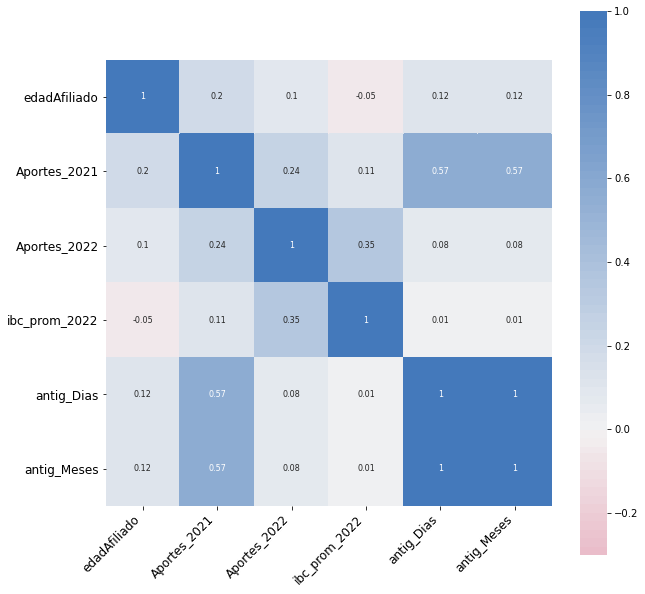

In [45]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    df.corr().round(2),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -0.3,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(0, 250, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

<a id="section_labelling"></a>    
### 8. GENERACIÓN DE LA VARIABLE TARGET (LABELLING)

In [46]:
# Construiremos la variable Target "Bal_POsitivo" como una combinación de dos máscaras (mask_1_1 ó mask_1_2)
mask_1_1 = (df.Aportes_2022 > 3) & (df.antig_Meses > 3)
#mask_1_2 = (df.Aportes_2022 > 0) & (df.Aportes_2022 <= 3) & (df.antig_Meses <= 3)
mask_1_2 = (df.Aportes_2022 == df.antig_Meses) & (df.antig_Meses <= 3)
mask = mask_1_1 | mask_1_2
df['Bal_Positivo'] = mask.astype(int)
df = df.drop(columns=['Aportes_2022'], axis=1)
df = df.reset_index(drop=True)

In [47]:
df.head()

,afi_hash64,descTipoAfiliado,DescripcionTipoVinculacion,Ciudad,Regional,descSexo,edadAfiliado,Aportes_2021,ibc_prom_2022,fecha_ingreso,antig_Dias,antig_Meses,Bal_Positivo
0,08cba7814a8416a4df33e6b44239d766ae665add,DEPENDIENTE,VINCULACION INICIAL,POPAYAN,REGIONAL OCCIDENTE Y CAFETERA,FEMENINO,37.0,4.0,1.5,2022-03-01,121,4.0,0
1,d077c958b097dd793593ed5047f7dbdccb1c1a3f,DEPENDIENTE,VINCULACION INICIAL,IBAGUE,EQUIPO CANALES Y GESTION COMERCIAL,MASCULINO,34.0,11.0,1.0,2022-03-01,121,4.0,1
2,b3bfd5e9ba5f00d96b8fdc7e86462cb05a93d5b3,DEPENDIENTE,VINCULACION INICIAL,SIN CLASIFICAR,REGIONAL OCCIDENTE Y CAFETERA,MASCULINO,25.0,4.0,1.5,2022-02-01,149,5.0,1
3,5f7bd3a5b1673f4b244775641d02f1a18774e6c9,VOLUNTARIO,VINCULACION INICIAL,CUCUTA,REGIONAL CENTRO,FEMENINO,27.0,1.0,1.5,2022-01-01,180,6.0,1
4,e03577574b4103ff48d6d3160e39c7c31108bdb7,DEPENDIENTE,VINCULACION INICIAL,SIN CLASIFICAR,REGIONAL OCCIDENTE Y CAFETERA,MASCULINO,20.0,1.0,1.0,2022-01-01,180,6.0,1


In [48]:
df.describe()

,edadAfiliado,Aportes_2021,ibc_prom_2022,antig_Dias,antig_Meses,Bal_Positivo
count,114276.000000,114276.000000,114276.000000,114276.000000,114276.000000,114276.000000
mean,27.289063,5.595523,1.259276,544.956981,17.970703,0.634236
std,8.250403,3.738742,0.249829,203.643191,6.692679,0.481646
min,16.000000,1.000000,1.000000,60.000000,2.000000,0.000000
25%,21.000000,2.000000,1.000000,364.000000,12.000000,0.000000
50%,24.000000,5.000000,1.500000,545.000000,18.000000,1.000000
75%,31.000000,9.000000,1.500000,698.000000,23.000000,1.000000
max,62.000000,12.000000,1.500000,911.000000,30.000000,1.000000


In [49]:
df.corr()

,edadAfiliado,Aportes_2021,ibc_prom_2022,antig_Dias,antig_Meses,Bal_Positivo
edadAfiliado,1.000000,0.196337,-0.050004,0.124564,0.124518,0.094446
Aportes_2021,0.196337,1.000000,0.110633,0.571735,0.571908,0.208176
ibc_prom_2022,-0.050004,0.110633,1.000000,0.006030,0.006011,0.302947
antig_Dias,0.124564,0.571735,0.006030,1.000000,0.999995,0.083605
antig_Meses,0.124518,0.571908,0.006011,0.999995,1.000000,0.083584
Bal_Positivo,0.094446,0.208176,0.302947,0.083605,0.083584,1.000000


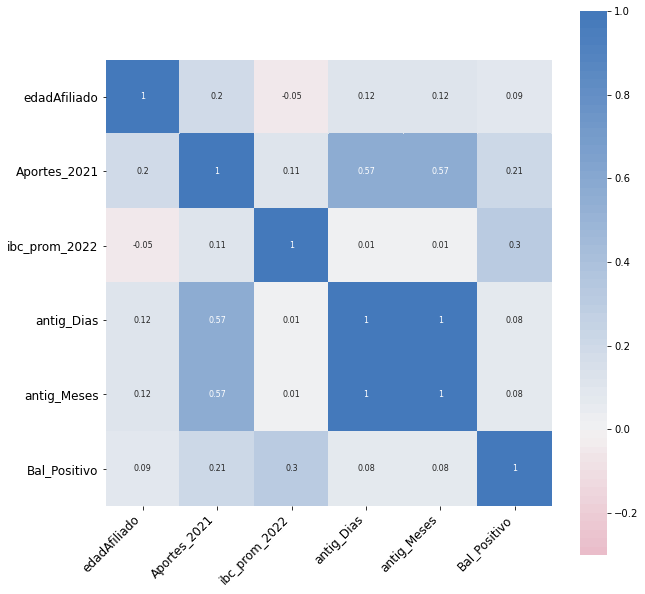

In [50]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    df.corr().round(2),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -0.3,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(0, 250, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

<a id="section_archivo_csv"></a>    
### 8. EXPORTACIÓN A ARCHIVO CSV

In [51]:
df.to_csv('Pronostico_Aportes_limpio.csv', index=False)

In [52]:
df.Bal_Positivo.value_counts(normalize=True)

1    0.634236
0    0.365764
Name: Bal_Positivo, dtype: float64